<a href="https://colab.research.google.com/github/anruki/Quantum-Programming-Applications/blob/main/ibex35_max_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUANTUM COMPUTERS** - IBEX35

In [1]:
pip install yfinance

Instalar librerías

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from scipy.optimize import minimize
from itertools import combinations

Lista de as empresas del IBEX35 2024

In [5]:
ibex35_tickers = [
    "ANA.MC",   # Acciona
    "ACX.MC",   # Acerinox
    "ACS.MC",   # ACS
    "AENA.MC",  # Aena
    "ALM.MC",   # Almirall
    "AMS.MC",   # Amadeus IT Group
    "ANA.MC",   # Acciona Energía
    "BBVA.MC",  # BBVA
    "CABK.MC",  # CaixaBank
    "CLNX.MC",  # Cellnex Telecom
    "DIA.MC",   # Distribuidora Internacional de Alimentación (DIA)
    "EBRO.MC",  # Ebro Foods
    "ELE.MC",   # Endesa
    "ENG.MC",   # Enagás
    "FER.MC",   # Ferrovial
    "GRF.MC",   # Grifols
    "IBE.MC",   # Iberdrola
    "IDR.MC",   # Indra
    "ITX.MC",   # Inditex
    "COL.MC",   # Inmobiliaria Colonial
    "LOG.MC",   # Logista
    "MAP.MC",   # Mapfre
    "MEL.MC",   # Meliá Hotels
    "MRL.MC",   # Merlin Properties
    "NTGY.MC",  # Naturgy (Gas Natural)
    "PHM.MC",   # PharmaMar
    "REE.MC",   # Red Eléctrica
    "REP.MC",   # Repsol
    "ROVI.MC",  # Rovi
    "SAB.MC",   # Banco Sabadell
    "SAN.MC",   # Banco Santander
    "SGRE.MC",  # Siemens Gamesa
    "SLR.MC",   # Solaria
    "TEF.MC",   # Telefónica
    "VIS.MC"    # Viscofan
]


Definir el rango de fechas

In [6]:
start_date = "2024-01-01"
end_date = "2024-12-31"

Descargar datos:

In [7]:
ibex35_data = yf.download(ibex35_tickers, start=start_date, end=end_date, group_by='ticker')

[*********************100%***********************]  34 of 34 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['REE.MC', 'SGRE.MC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Eliminar NaNs

In [8]:
# Eliminar las empresas con valores NaN en cualquier columna
clean_ibex35_data = ibex35_data.dropna(axis=1, how='any')

# Guardar los datos limpios a un archivo CSV
clean_ibex35_data.to_csv("clean_ibex35_2024.csv")

# Mostrar qué empresas han sido eliminadas
dropped_tickers = [col[0] for col in ibex35_data.columns if col[0] not in clean_ibex35_data.columns.get_level_values(0)]
print(f"Empresas eliminadas por NaN: {dropped_tickers}")


Empresas eliminadas por NaN: ['REE.MC', 'REE.MC', 'REE.MC', 'REE.MC', 'REE.MC', 'REE.MC', 'SGRE.MC', 'SGRE.MC', 'SGRE.MC', 'SGRE.MC', 'SGRE.MC', 'SGRE.MC']


In [9]:
# Mostrar las primeras filas de los datos limpios
clean_ibex35_data.head()

Ticker      GRF.MC                                     IBE.MC             \
Price         Open    High     Low  Close   Volume       Open       High   
Date                                                                       
2024-01-02  15.380  15.630  14.775  14.86  3470439  11.268016  11.333745   
2024-01-03  14.820  14.925  14.415  14.46  1639443  11.197591  11.249236   
2024-01-04  14.520  15.045  14.520  14.94  1802975  11.160031  11.314966   
2024-01-05  14.820  14.820  14.510  14.57  1564917  11.221065  11.329050   
2024-01-08  14.555  14.590  14.055  14.24  1935257  11.258626  11.338441   

Ticker                                      ...    ALM.MC                      \
Price             Low      Close    Volume  ...      Open      High       Low   
Date                                        ...                                 
2024-01-02  11.089606  11.150640  12175208  ...  8.257090  8.507156  8.257090   
2024-01-03  11.103691  11.113081  10708600  ...  8.512059  8.551285  8.335542   
2024-01-04  11.160031  11.296185  17462323  ...  8.418897  8.531672  8.384575   
2024-01-05  11.160031  11.300880  10171410  ...  8.394381  8.448317  8.286509   
2024-01-08  11.230456  11.263321  14466437  ...  8.369864  8.531672  8.325735   

Ticker                           SLR.MC                                   \
Price          Close  Volume       Open       High        Low      Close   
Date                                                                       
2024-01-02  8.467930  194832  18.639999  18.709999  17.834999  17.870001   
2024-01-03  8.379671  156770  17.860001  17.934999  17.120001  17.334999   
2024-01-04  8.472834  118288  17.450001  17.510000  16.955000  17.059999   
2024-01-05  8.369864  122046  16.950001  16.990000  16.440001  16.844999   
2024-01-08  8.531672  119238  16.865000  16.985001  16.375000  16.760000   

Ticker              
Price       Volume  
Date                
2024-01-02  512024  
2024-01-03  539976  
2024-01-04  573768  
2024-01-05  853254  
2024-01-08  406101  

[5 rows x 160 columns]

GRÁFICA VALORES DE CIERRE

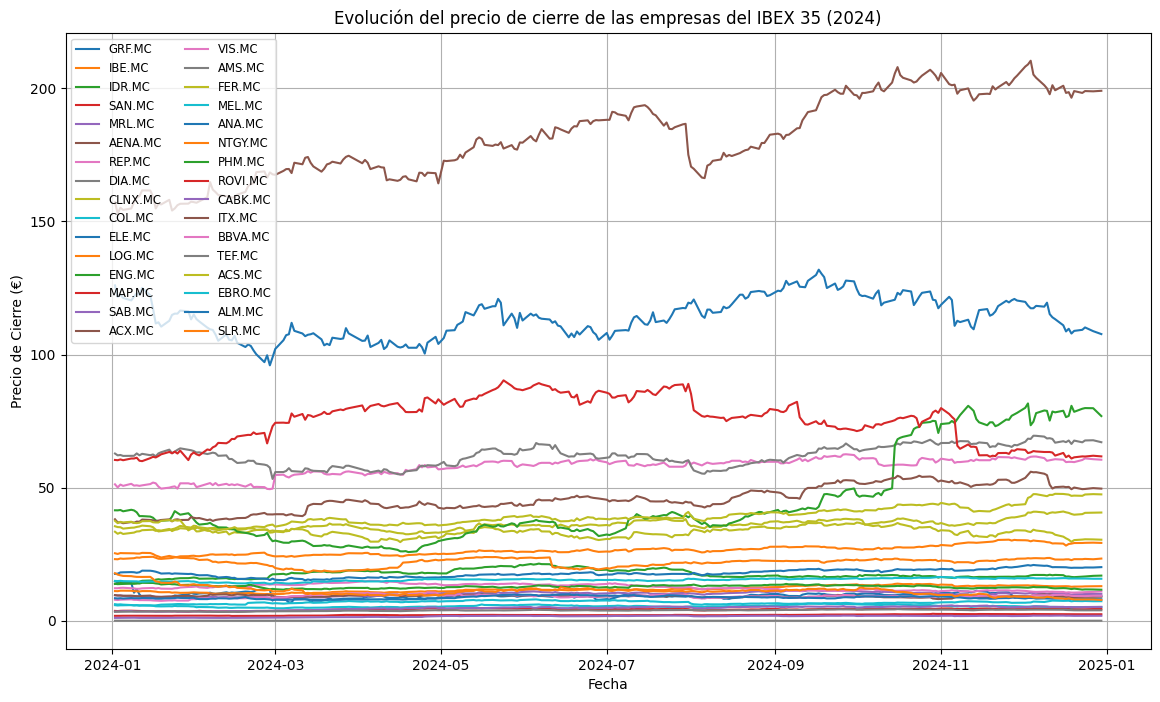

<Figure size 640x480 with 0 Axes>

In [10]:

# Extraer los precios de cierre de las empresas restantes
closing_prices = clean_ibex35_data.xs('Close', level=1, axis=1)

# Graficar cada empresa
plt.figure(figsize=(14, 8))

for ticker in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)

plt.title('Evolución del precio de cierre de las empresas del IBEX 35 (2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (€)')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid()
plt.show()

# Guardar la gráfica
plt.savefig("ibex35_closing_prices.png", dpi=300)



GRÁFICA DE RETORNOS

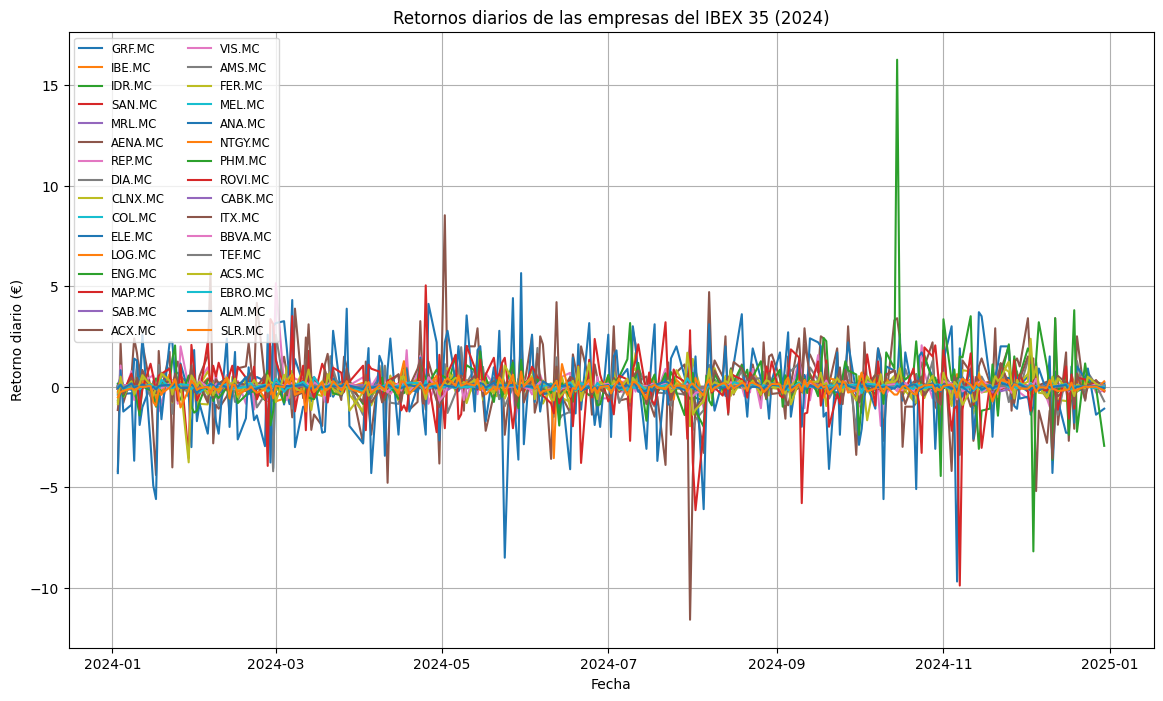

Empresas incluidas en las gráficas: ['GRF.MC', 'IBE.MC', 'IDR.MC', 'SAN.MC', 'MRL.MC', 'AENA.MC', 'REP.MC', 'DIA.MC', 'CLNX.MC', 'COL.MC', 'ELE.MC', 'LOG.MC', 'ENG.MC', 'MAP.MC', 'SAB.MC', 'ACX.MC', 'VIS.MC', 'AMS.MC', 'FER.MC', 'MEL.MC', 'ANA.MC', 'NTGY.MC', 'PHM.MC', 'ROVI.MC', 'CABK.MC', 'ITX.MC', 'BBVA.MC', 'TEF.MC', 'ACS.MC', 'EBRO.MC', 'ALM.MC', 'SLR.MC']


<Figure size 640x480 with 0 Axes>

In [11]:
# Calcular los retornos diarios como la diferencia entre el precio actual y el del día anterior
daily_returns = closing_prices.diff()


# Graficar los retornos diarios
plt.figure(figsize=(14, 8))
for ticker in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)

plt.title('Retornos diarios de las empresas del IBEX 35 (2024)')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario (€)')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid()
plt.show()

# Guardar las gráficas como archivos PNG
plt.savefig("ibex35_daily_returns.png", dpi=300)

# Mostrar las empresas incluidas después de eliminar NaN
print(f"Empresas incluidas en las gráficas: {closing_prices.columns.tolist()}")


GRÁFICA DE BARRAS CON MEDIA DE RETORNO DE CADA EMPRESA.

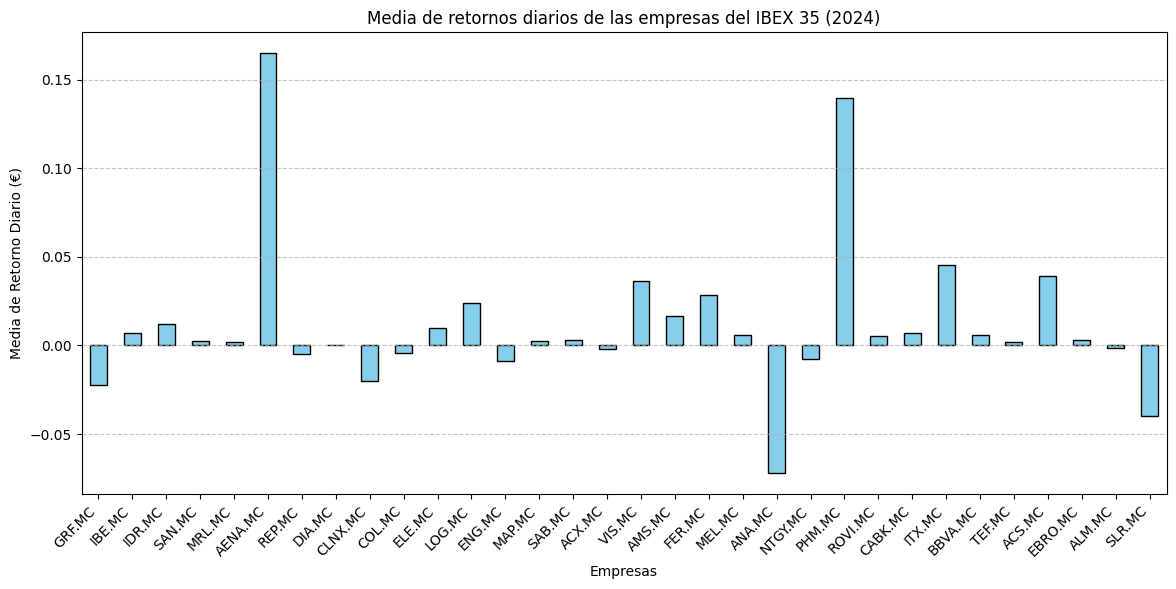

Ticker
GRF.MC    -0.022346
IBE.MC     0.007253
IDR.MC     0.012065
SAN.MC     0.002766
MRL.MC     0.001977
AENA.MC    0.164836
REP.MC    -0.004649
DIA.MC     0.000013
CLNX.MC   -0.019882
COL.MC    -0.004151
ELE.MC     0.009983
LOG.MC     0.023988
ENG.MC    -0.008536
MAP.MC     0.002349
SAB.MC     0.003106
ACX.MC    -0.002180
VIS.MC     0.036406
AMS.MC     0.016744
FER.MC     0.028414
MEL.MC     0.005889
ANA.MC    -0.072058
NTGY.MC   -0.007848
PHM.MC     0.139389
ROVI.MC    0.005276
CABK.MC    0.007022
ITX.MC     0.045328
BBVA.MC    0.005854
TEF.MC     0.002178
ACS.MC     0.039107
EBRO.MC    0.003243
ALM.MC    -0.001527
SLR.MC    -0.039626
dtype: float64


In [12]:
# Calcular la media de retorno de cada empresa
mean_returns = daily_returns.mean()

# Crear una gráfica de barras
plt.figure(figsize=(14, 6))
mean_returns.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Media de retornos diarios de las empresas del IBEX 35 (2024)')
plt.xlabel('Empresas')
plt.ylabel('Media de Retorno Diario (€)')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de las empresas para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar la gráfica
plt.savefig("ibex35_mean_returns.png", dpi=300)

plt.show()

# Mostrar la media de retorno calculada
print(mean_returns)


HEATMAP COVARIANZA DE LOS RETORNOS

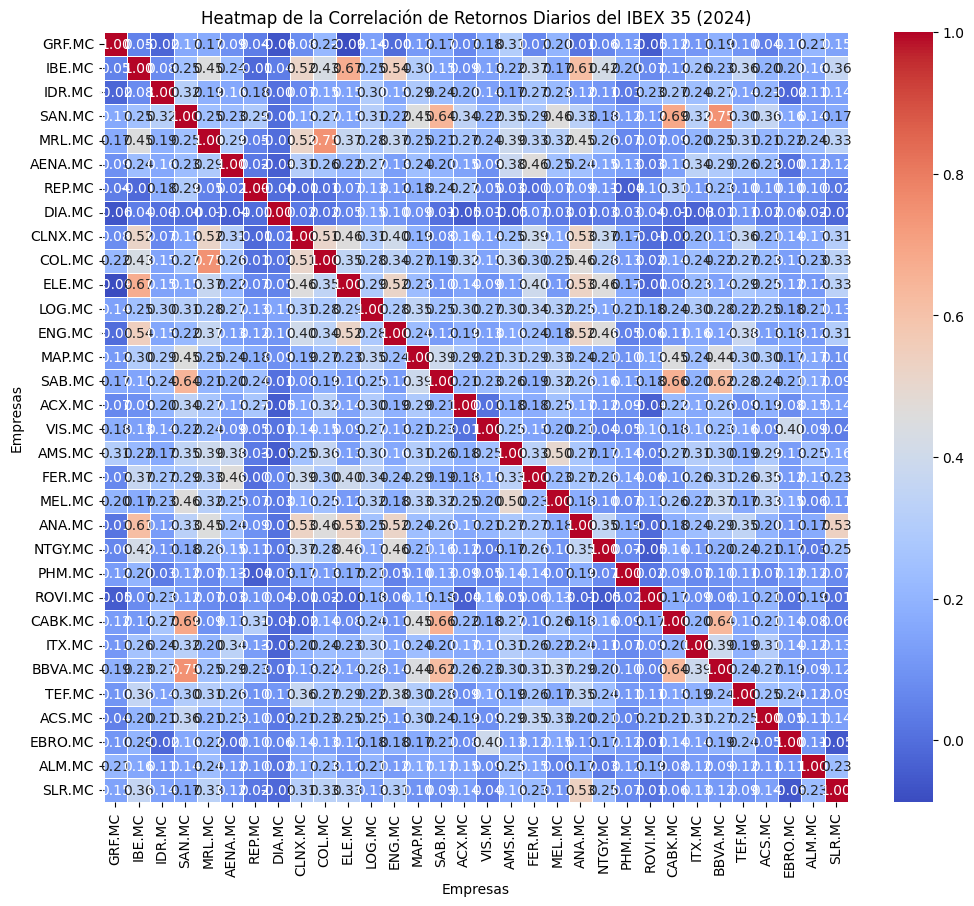

In [13]:
# Calcular la matriz de covarianza
cov_matrix = daily_returns.cov()

# Calcular la matriz de correlación (normalización)
std_devs = daily_returns.std()  # Desviación estándar de cada acción
corr_matrix = cov_matrix / (std_devs.values[:, None] * std_devs.values[None, :])

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap de la Correlación de Retornos Diarios del IBEX 35 (2024)')
plt.xlabel('Empresas')
plt.ylabel('Empresas')

# Guardar la gráfica
plt.savefig("ibex35_correlation_heatmap.png", dpi=300)

plt.show()


Descargar el csv

In [14]:
from google.colab import files
# Descargar el archivo CSV a tu máquina local
files.download("clean_ibex35_2024.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Definimos la función:
$$ f(x) = ∑_{i}μ_{i}\dot\ x_{i} - q∑_{i}∑_{j}x_{i} \dot\ COVMATRIX \dot\ x_{j} $$

Queremos probar todas las combinaciones posibles de empresas para 5 empresas. Y utilizar la combinación de empresas que tenga f(x) máximo.

In [15]:
# Definir el valor de q
q = 0.5

In [16]:
# Generar todas las combinaciones posibles de 5 empresas (en este caso solo hay una combinación)
combinations_list = list(combinations(ibex35_tickers, 5))  # Para este caso solo hay una combinación

In [18]:
combinations_list

[('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'ALM.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'AMS.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'ANA.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'BBVA.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'CABK.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'CLNX.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'DIA.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'EBRO.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'ELE.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'ENG.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'FER.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'GRF.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'IBE.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'IDR.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'ITX.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'COL.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'LOG.MC'),
 ('ANA.MC', 'ACX.MC', 'ACS.MC', 'AENA.MC', 'MAP.MC'),
 ('ANA.MC', 'ACX.MC', 'A

In [ ]:
def objective_function(x, mean_returns, cov_matrix, q):
  sum_retorno = 0
  sum_riesgo = 0
  for i in range(5):
    for j in range(5):
      sum_retorno = sum_retorno + mean_returns[i] * x[i]
      sum_riesgo = sum_riesgo + x[i]*cov_matrix[i,j]*x[j]
  return sum_retorno - q*sum_riesgo
